In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import save_model #, load_model
from tensorflow.python.client import device_lib
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
import pandas as pd

Using TensorFlow backend.


In [3]:
print(f"tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

tensorflow version: 1.11.0
Keras version: 2.2.4


In [5]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9

sess = tf.Session(config=config)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13479768033567904151
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7730941132
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12894660003430959988
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [6]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Загрузка

In [7]:
def visualize(data):
    plt.imshow(data, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

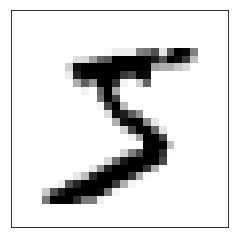

In [11]:
visualize(x_train[0])

In [12]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Model Train and Save

In [13]:
#with tf.device('/GPU:1'):
model = Sequential()
model.add(Flatten())
model.add(Dense(28*28, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
%timeit -n1 -r1 model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3124 - acc: 0.9138
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1269 - acc: 0.9629
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0829 - acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0582 - acc: 0.9835
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0442 - acc: 0.9877: 1s - loss: 
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0327 - acc: 0.9910
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0237 - acc: 0.9941
Epoch 8/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0177 - acc: 0.9953
Epoch 9/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0127 - acc: 0.9972
Epoch 10/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0089 

In [15]:
# %timeit -n1 -r1 
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=784)
print(f"Validation loss={val_loss}\nValidation accuracy={val_acc}")

10000/10000 [==============================] - 0s 9us/step
Validation loss=0.08930484592020511
Validation accuracy=0.978999993610382


In [16]:
# saving
save_model(model, 'mnist_model.hdf5', overwrite=False)

[WARNING] mnist_model.hdf5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


FailedPreconditionError: Attempting to use uninitialized value dense_1/bias
	 [[{{node dense_1/bias/_0}} = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_6_dense_1/bias", _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/bias)]]
	 [[{{node dense_1/kernel/_3}} = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_8_dense_1/kernel", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

## Model Load and evaluate accuracy

In [17]:
# loading
model = load_model('mnist_model.hdf5')

ValueError: Unable to create group (no write intent on file)

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=784)
print(f"Validation loss={val_loss:.02%}\nValidation accuracy={val_acc:.02%}")

10000/10000 [==============================] - 0s 12us/step
Validation loss=8.93%
Validation accuracy=97.90%


## Model use

In [19]:
# первые N значений картинок из тестовой выборки
N = 10
y_test[:N]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

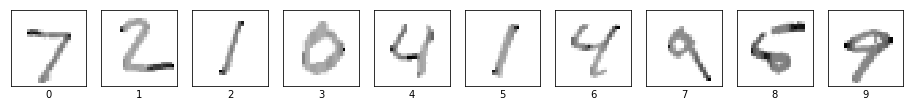

In [20]:
# визуализация первых N картинок из тестовой выборки
plt.rcParams['figure.figsize'] = [16, 2]
fig, ax = plt.subplots(nrows=1, ncols=N)
for x in range(N):
    ax[x].imshow(x_test[x], cmap=plt.cm.binary)
    ax[x].set_xticks([])
    ax[x].set_yticks([])
    ax[x].set_xlabel(str(x))
plt.show()

In [21]:
# классификация картинок
predictions = model.predict_classes(x_test)

## Анализ результатов

In [22]:
# датафрейм с исходными значениями тестовой выборки и предсказанными моделью
df = pd.DataFrame(list(zip(y_test, predictions)), columns=['actual', 'predicted'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
actual       10000 non-null int64
predicted    10000 non-null int64
dtypes: int64(2)
memory usage: 156.3 KB


In [24]:
# выводим ошибки предсказаний
df_errors = df[df.actual != df.predicted]
df_errors.head()

,actual,predicted
18,3,8
96,1,9
115,4,9
149,2,9
247,4,2


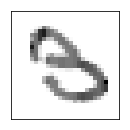

In [25]:
# показываем одну из ошибок
visualize(x_test[18])

In [26]:
print(f"Всего ошибок - {len(df_errors)}")
print(f"Процент ошибок - {len(df_errors) / len(df):.02%}")
print(f"Точность классификации - {1 - len(df_errors) / len(df):.02%}")

Всего ошибок - 210
Процент ошибок - 2.10%
Точность классификации - 97.90%
